In [2]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()
# 고객데이터, 이름, 성별

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
item_master = pd.read_csv('item_master.csv')
item_master.head()
# 상품 데이터, 상품명, 상품 가격

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [6]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()
# 구매내역 데이터

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()
# 구매내역 상세 데이터
# quantity : 수량
# transaction : 거래

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [11]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()
# 구매내역 데이터 결합

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [12]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()
# 구매내역 상세 데이터 결합

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [13]:
# 매출 데이터 끼리 결합
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [21]:
# 마스터데이터 결합(조인) - 상품, 고객 데이터
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name_x,registration_date_x,email_x,gender_x,age_x,birth_x,pref_x,item_name_x,item_price_x,customer_name_y,registration_date_y,email_y,gender_y,age_y,birth_y,pref_y,item_name_y,item_price_y,price,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [22]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price","price"]].head()
# 필요한 데이터 컬럼 (구매 수량, 가격, 총 구매 가격)

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [23]:
# 검산하기 (계산이 맞았는지 틀렸는지를 확인하기 위해 별도로 다시 계산하다.)
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [24]:
join_data.isnull().sum()

detail_id              0
transaction_id         0
item_id                0
quantity               0
payment_date           0
customer_id            0
customer_name_x        0
registration_date_x    0
email_x                0
gender_x               0
age_x                  0
birth_x                0
pref_x                 0
item_name_x            0
item_price_x           0
customer_name_y        0
registration_date_y    0
email_y                0
gender_y               0
age_y                  0
birth_y                0
pref_y                 0
item_name_y            0
item_price_y           0
price                  0
customer_name          0
registration_date      0
email                  0
gender                 0
age                    0
birth                  0
pref                   0
item_name              0
item_price             0
dtype: int64

In [25]:
join_data.describe()
# describe : 각종 통계량 출력

,detail_id,quantity,age_x,item_price_x,age_y,item_price_y,price,age,item_price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,50.265677,121698.628219,135937.150056,50.265677,121698.628219
std,2062.439494,0.513647,17.190314,64571.311830,17.190314,64571.311830,68511.453297,17.190314,64571.311830
min,0.000000,1.000000,20.000000,50000.000000,20.000000,50000.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,36.000000,50000.000000,85000.000000,36.000000,50000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,50.000000,102500.000000,120000.000000,50.000000,102500.000000
75%,5357.250000,1.000000,65.000000,187500.000000,65.000000,187500.000000,210000.000000,65.000000,187500.000000
max,7143.000000,4.000000,80.000000,210000.000000,80.000000,210000.000000,420000.000000,80.000000,210000.000000


In [26]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())
# 데이터의 기간

2019-02-01 01:36:57
2019-07-31 23:41:38


In [27]:
join_data.dtypes

detail_id               int64
transaction_id         object
item_id                object
quantity                int64
payment_date           object
customer_id            object
customer_name_x        object
registration_date_x    object
email_x                object
gender_x               object
age_x                   int64
birth_x                object
pref_x                 object
item_name_x            object
item_price_x            int64
customer_name_y        object
registration_date_y    object
email_y                object
gender_y               object
age_y                   int64
birth_y                object
pref_y                 object
item_name_y            object
item_price_y            int64
price                   int64
customer_name          object
registration_date      object
email                  object
gender                 object
age                     int64
birth                  object
pref                   object
item_name              object
item_price

In [29]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
# strftime : 연월 추출 
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [38]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [40]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]
# 월별, 상품별로 데이터 집계

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [43]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')
# aggfunc : 집계 방법
# pd.pivot_table : 행과 칼럼 지정해서 표를 만들기.

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

In [44]:
# 매출 추이 가시화 하기
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


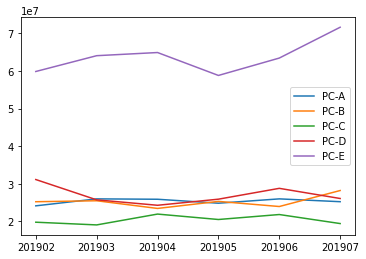

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()  